<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-2:-Pneumonia-X-ray-image-analysis-(Model-3)" data-toc-modified-id="Case-2:-Pneumonia-X-ray-image-analysis"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case 2: Pneumonia X-ray image analysis</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Models-and-training" data-toc-modified-id="Models-and-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Models and training</a></span></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Discussion</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Case 2: Pneumonia X-ray image analysis (Model 3)
Team 16:
    1. Bellarina Chew
    2. Nik Adam Nik Joharris
    3. Valentin Dassin
Last modified: 27.02.2020<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## Background
The aim of this notebook is to create and train a dense neural network to classify medical images accurately with convolutional neural network using the dataset from https://data.mendeley.com/datasets/rscbjbr9sj/2 

## Data
The dataset used is a dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification from Mendeley Data [1].

In [12]:
# Import necessary module
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as ts
import os

# Import libraries
from tensorflow import keras

# Import keras specific
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

Populating the interactive namespace from numpy and matplotlib


#### Load training files

In [13]:
# Training files can be found here
#train_dir = "/Users/bella/Desktop/year 3/Neural Network/chest_xray/train"

# Test files can be found here
#test_dir = "/Users/bella/Desktop/year 3/Neural Network/chest_xray/test"
train_dir = "/Users/User/Desktop/Boulot/DUETI/S2/1rst part/neural/ChestXRay2017/chest_xray/train"
test_dir = "/Users/User/Desktop/Boulot/DUETI/S2/1rst part/neural/ChestXRay2017/chest_xray/test"

# List training files
print('Training file directory :', os.listdir(train_dir))

# list test files
print('Testing file directory :', os.listdir(test_dir))

Training file directory : ['.DS_Store', 'NORMAL', 'PNEUMONIA']
Testing file directory : ['.DS_Store', 'NORMAL', 'PNEUMONIA']


### Preprocess data

#### Scaling
The data must be preprocessed before training the network. Scale these images to a range of 0 to 1 before feeding them to the neural network model.<br>
#### Split data
We will also split the <b>training data</b> into training and validation sets where :
- Training data = 70%
- Validation data = 30%

In [24]:
# Rescale training images and split training data
train_datagen = ImageDataGenerator (rescale=1./255, validation_split = 0.3)

#### Create data generators

In [15]:
# training data generator
print('Training : ')
train_generator = train_datagen.flow_from_directory(
    train_dir, #target directory
    target_size = (224, 224), #Image resize
    batch_size = 32,
    class_mode = 'binary', # since we only have 2 classification: normal/pneumonia
    subset = "training")

# validation data generator
print('\nValidation : ')
dev_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle=False,
    subset = "validation")

Training : 
Found 3664 images belonging to 2 classes.

Validation : 
Found 1568 images belonging to 2 classes.


#### Now we test if the train generator works :


The first image from the training batch : 


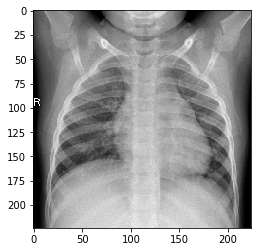

If you inspect the first image from the batch, you will see that the pixel values fall in the range of 0 to 224

labels batch : 


array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
      dtype=float32)

In [5]:
# labels_batch place labels automatically. For whichever folder to come first alphabetically, it will be labelled 0. 
# e.g normal =0 and pneumonia=1
i = 0
for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 5:
        break  
        
# Testing continues
# Then we will check the first image from the training batch
print('\nThe first image from the training batch : ')
imshow(data_batch[0])
show()

print('If you inspect the first image from the batch, you will see that the pixel values fall in the range of 0 to 224')

# Testng continues
# We will then check the last labels batch
print('\nlabels batch : ')
labels_batch

## Models and training
We will now create a simple CNN model. The learning network designed for the work is being referred from Chakraborty et al.(2019)[2]. The network is a CNN with 3 Convolution layers followed by 5 Dense layers including the output layer. In addition, a series of max pooling layers have been utilized in the architecture for reducing the dimensionality of the images. It is not a necessary attribute but it is an effective way to make the models efficient and increase their predictive power.

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

### Compile the model :
Before the model is ready for training, it needs a few more settings to compile.

In [7]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['acc'])

### Train the model :
To start training, we call the model.fit method to "fit" the model to the data:

In [8]:
# Start the clock
start = time.time()

print('Training...', end='')
history = model.fit_generator(
    train_generator,
    steps_per_epoch = None,
    verbose = 2,
    epochs = 4,
    validation_data = dev_generator,
    validation_steps = None)

# Check the time and calculate the elapsed time and tie per epoch
end = time.time()
elapsed = end-start
time_per_epoch = elapsed/2 #number of epochs

print('Done')
print(f'Time elapsed = {elapsed:.0f} seconds')
print(f'Time per epoch = {time_per_epoch:.2f} seconds.')

Training...Epoch 1/4
115/115 - 856s - loss: 0.3483 - acc: 0.8368 - val_loss: 0.9704 - val_acc: 0.7423
Epoch 2/4
115/115 - 867s - loss: 0.1379 - acc: 0.9484 - val_loss: 0.2456 - val_acc: 0.9062
Epoch 3/4
115/115 - 826s - loss: 0.1113 - acc: 0.9566 - val_loss: 0.2981 - val_acc: 0.8967
Epoch 4/4
115/115 - 877s - loss: 0.1218 - acc: 0.9531 - val_loss: 0.1313 - val_acc: 0.9420
Done
Time elapsed = 3426 seconds
Time per epoch = 1712.85 seconds.


In [9]:
# Create the graph of Training and Validation accuracy & loss vs. epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

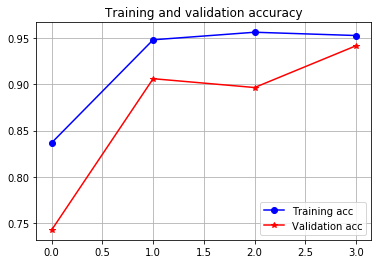

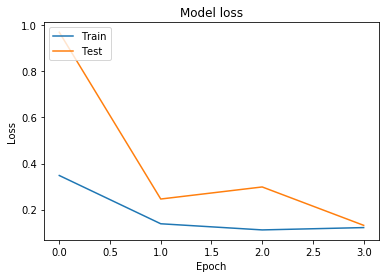

In [10]:
# plot accuracy and loss lerning curves for training and validation set
plot(epochs, acc, 'bo-', label = 'Training acc')
plot(epochs, val_acc, 'r*-', label = 'Validation acc' )
title('Training and validation accuracy')
grid()
legend()
show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Results and Discussion


Lets use various metrics to gain insights of the model's performance. First we will have to find the best threshold from ROC curve.

### ROC curve

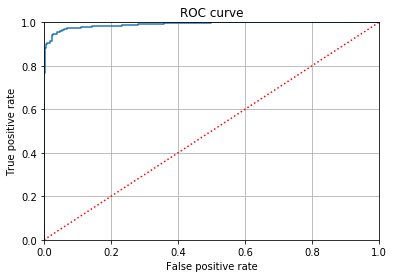

In [20]:
# Calulate the ROC curve analysis
labels = dev_generator.classes
predict = model.predict_generator(dev_generator)
fpr, tpr, thresholds = roc_curve(labels, predict, pos_label=1)

# Show ROC curve
plot(fpr, tpr)
plot([0,1],[0,1],'r:')
xlabel('False positive rate')
ylabel('True positive rate')
title('ROC curve')
xlim([0,1])
ylim([0,1])
grid()

In ROC curve, the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. The closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test (Zweig & Campbell, 1993). This means, this model has a high overall accuracy. After obtaining the TPR and FPR, we will be able to identify the best threshold.

### Threshold analysis
The best threshold would be obtained by using the roc curve where true positive rate(tpr) and false positive rate(fpr) overlap.

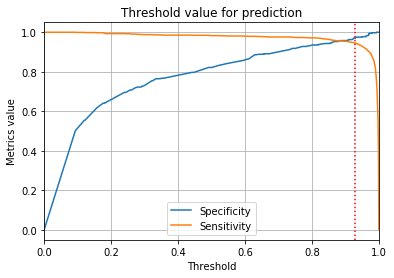

In [21]:
# Find the best threshold
plot(thresholds, 1 - fpr, label='Specificity')
plot(thresholds, tpr, label='Sensitivity')
axvline(0.93, color='red', linestyle=':')
xlim([0,1])
title('Threshold value for prediction')
xlabel('Threshold')
ylabel('Metrics value')
legend()
grid()

The best threshold is 0.93
### Evaluate accuracy
After training is complete, we'll evaluate how the model performs with the best threshold. 

In [22]:
# reset the validation generator and then use our trained model to make predictions on the data
print("[INFO] evaluating network...")
dev_generator.reset()
predict = model.predict_generator(dev_generator)

# for each image in the testing set we need to find the labels
labels = dev_generator.classes

# show a nicely formatted classification report
print(classification_report(labels, predict>0.93, target_names=['Normal(0)', 'Pneumonia(1)']))

[INFO] evaluating network...
              precision    recall  f1-score   support

   Normal(0)       0.86      0.97      0.91       404
Pneumonia(1)       0.99      0.95      0.97      1164

    accuracy                           0.95      1568
   macro avg       0.93      0.96      0.94      1568
weighted avg       0.96      0.95      0.95      1568



In [23]:
# compute the confusion matrix and use it to derive the raw accuracy, sensitivity, and specificity
cm = confusion_matrix(labels, predict>0.93)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("\naccuracy: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 393   11]
 [  64 1100]]

accuracy: 0.9522
sensitivity: 0.9728
specificity: 0.9450


The convolutional neural network (CNN) designed by Chakraborty et al.(2018) utilized the Adam optimization algorithm which tends to much time and computationally efficient than the other algorithms. The result that was obtained based upon the designed CNN model was found to be unsuitable. The Training accuracy of the model aimed to be 100% while the Testing accuracy of the model was found to be 95.92%. The average sensitivity and specificity of the model was found to be decent. The  confusion matrix that has been generated based on the predictive performance of CNN model. Based on the confusion matrix it can
be observed that the model underwent a very small percentage of mispredictions and also demonstrated an overall accuracy of 95.92% with an a sensitivity an specificity of 95.30% and 96.13% respectively. 


## Conclusion

With the increasing demand of clinical imaging techniques for the determination of chronic diseases and abnormalities in the health in this era, it has been quite obviously a concern for clinical physicians and doctors to correctly identify the aneurysms and abnormalities in imaging records of a particular patient. In this work we have tried to detect of pneumonia using Chest Xrays. For the detection purpose a convolutional neural network architecture was leveraged which allowed us to obtain the spatial significance of the data in the images to correctly classify the chest x-rays to be prone of pneumonia or not. This model fetched exceptional results by plotting an overall accuracy of 94.5% with a sensitivity and specificity of 97.30% and 96.13% respectively, meaning that it was able to accurately predict the existence of pneumonia in abnormal Chest X-rays as well as the lack of pneumonia in healthy Chest X-rays. Therefore, this model can be inadvertently accepted in the clinical industry to correctly identify the chest x-rays with disorders from the normal ones for a weighted clinical decision. A good optimized model is the work of trial and error and making informed guesses on your hyperparameters and epochs that needs to be run. Setting up the training data is also one of the more fundamental issues in the overall success of the model.

## References 
1. Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, v2
2. Chakraborty, Sabyasachi & Aich, Satyabrata & Sim, Jong & Kim, Hee-Cheol. (2019). Detection of Pneumonia from Chest X-Rays using a Convolutional Neural Network Architecture.